This notebook is a guide to reproduce all the models run on the C4 datasets.

Most of the code needed is already included into [npyx](www.github.com/m-beau/NeuroPyxels), so the following Notebook will be just a guide on the order to run things to fully reproduce what was done.

# 1. Datasets initialisation

The first step to reproduce all the results is, of course, to download the C4 datasets. To allow this, the user needs to **create a folder** in a place of choosing (e.g. a folder called `C4_datasets` on the Desktop), which will become the **working folder** for all subsequent steps. This is very important as all scripts will require this folder to be specified.

Then, the datasets can be either downloaded manually [from this link](https://www.c4-database.com/apps/about) and placed in the working folder, or, alternatively, can be downloaded automatically from the scripts run within npyx as needed. This latter option should be preferred as only the datasets needed to reproduce certain steps will be downloaded.

In [42]:
import os
import psutil

WORKING_FOLDER = "/media/maxime/AnalysisSSD/reproduction"

assert os.path.exists(
    WORKING_FOLDER
), "Please make sure the working folder exists and the path provided is correct!"


hdd = psutil.disk_usage(WORKING_FOLDER)

free_space = hdd.free / (2**30)
print (f"Free space at {WORKING_FOLDER}: {free_space:.2f} GiB")

assert free_space >= 150,\
    f"Please make sure you have at least 150 GiB of free space on the drive of {WORKING_FOLDER}! If you already have the datasets at this location, ignore this error."

Free space at /media/maxime/AnalysisSSD/reproduction: 215.86 GiB


In [43]:
%load_ext autoreload
%autoreload 2

import npyx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### How to run scripts
In this notebook we will be importing and running the `main` functions comprised within modules of `npyx.c4`, which will work on binary h5 datasets which must already be on your machine (see `npyx.h5` functions). However, if you prefer, you can run them from the command line by having npyx installed and running:
<br>
`python -m npyx.c4.some_c4_module --some-argument argument-value`.

The list of 'some_c4_module' is:
- `dataset_init` -> downloads the h5 datasets if not present; make some summary plots; compute engineered features;
    calls the following scripts in particular (runnable independently):
    - `acg_vs_firing_rate` ->  compute 3D autocorrelograms 
    - `monkey_dataset_init` -> does the same with monkey h5 dataset
- `encode_features` -> run VAEs on 3D ACGs and peak waveforms to get their latent representations
- `run_baseline_classifier` -> run a classifier (LR, RF... any scikit-learn model) on a specified feature space (engineered, encoded...)
- `run_deep_classifier` -> runs the semi-supervised deep model (VAEs + batchnorm + MLP)

A concrete example could be:
<br>
`python -m npyx.c4.dataset_init --data-folder /path/to/your/working/folder`

Conveniently, if you do not know which command line arguments a certain script uses, you can always do:
<br>
`python -m npyx.c4.some_c4_module --help`, which will show a helpful description of the script and its arguments.

## Running `dataset_init.py`

After having created the datasets folder, we can run the `dataset_init` script within npyx which will download the datasets if not present, make some summary plots, compute engineered features for the datasets and also compute, if requested, 3D autocorrelograms which are needed in subsequent analyses.

In [3]:
npyx.c4.dataset_init.main(data_folder=WORKING_FOLDER)

Loading dataset /media/maxime/AnalysisSSD/reproduction/C4_database_hull_labelled.h5


Reading dataset:   0%|          | 0/103 [00:00<?, ?it/s]

0 unlabelled and 103 labelled neurons loaded. 
0 neurons discarded, of which labelled: 0. More details at the 'discarded_df' attribute. 

Loading dataset /media/maxime/AnalysisSSD/reproduction/C4_database_hausser.h5


Reading dataset:   0%|          | 0/1998 [00:00<?, ?it/s]

1885 unlabelled and 113 labelled neurons loaded. 
0 neurons discarded, of which labelled: 0. More details at the 'discarded_df' attribute. 



Generating dataframe:   0%|          | 0/216 [00:00<?, ?it/s]

Plotting raw plots:   0%|          | 0/216 [00:00<?, ?it/s]

Extracting features:   0%|          | 0/211 [00:00<?, ?it/s]

Some neurons failed feature extraction: 
       label                dataset  unit        mfr       mifr   med_isi  \
177  PkC_cs  20-07-21_DK206_probe1    53   0.908824   2.091449  0.890833   
179  PkC_cs  20-07-21_DK206_probe1    91   1.266741   2.902571  0.686700   
181  PkC_cs  20-07-21_DK206_probe1   112   1.129647   2.125383  0.789617   
184  PkC_ss  20-07-21_DK206_probe1   572  63.724017  82.560012  0.013500   

     mode_isi  prct5ISI   entropy  CV2_mean  ...  onset_t  onset_amp  \
177  0.308845  0.139475  7.154676  0.852980  ...        0        0.0   
179  0.107070  0.112102  6.751317  0.845310  ...        0        0.0   
181  0.783967  0.139630  7.219157  0.805697  ...        0        0.0   
184  0.010399  0.006667  6.705033  0.505318  ...        0        0.0   

     wvf_width  peak_trough_ratio  tau_recovery  multiplicative_a_recovery  \
177          0                0.0           0.0                        0.0   
179          0                0.0           0.0             

Reading dataset:   0%|          | 0/1152 [00:00<?, ?it/s]

0 unlabelled and 668 labelled neurons loaded. 
0 neurons discarded, of which labelled: 0. More details at the 'discarded_df' attribute. 



Generating dataframe:   0%|          | 0/668 [00:00<?, ?it/s]

Loading dataset /media/maxime/AnalysisSSD/reproduction/C4_database_lisberger.h5


Reading dataset:   0%|          | 0/1152 [00:00<?, ?it/s]

0 unlabelled and 668 labelled neurons loaded. 
0 neurons discarded, of which labelled: 0. More details at the 'discarded_df' attribute. 



Generating dataframe:   0%|          | 0/668 [00:00<?, ?it/s]

Extracting features:   0%|          | 0/654 [00:00<?, ?it/s]

Some neurons failed feature extraction: 
       label           dataset  unit        mfr       mifr   med_isi  mode_isi  \
263  PkC_cs  2021_05_27_Edgar   452   1.436479   6.048386  0.532000  0.017884   
308  PkC_cs  2021_07_14_Edgar   512   1.135971   2.198694  0.734250  0.193958   
500  PkC_cs   Yoda_2019_10_30   896   0.844970   2.671984  0.918050  0.291070   
586     MLI   Yoda_2020_08_06  1027  19.701505  48.405949  0.026675  0.009680   

     prct5ISI   entropy  CV2_mean  ...  onset_t  onset_amp  wvf_width  \
263  0.042500  7.049680  0.958251  ...        0        0.0          0   
308  0.146390  6.930127  0.828158  ...        0        0.0          0   
500  0.112075  6.993293  0.898832  ...        0        0.0          0   
586  0.007800  7.084120  0.696880  ...        0        0.0          0   

     peak_trough_ratio  tau_recovery  multiplicative_a_recovery  \
263                0.0           0.0                        0.0   
308                0.0           0.0                

Reading dataset:   0%|          | 0/103 [00:00<?, ?it/s]

0 unlabelled and 103 labelled neurons loaded. 
0 neurons discarded, of which labelled: 0. More details at the 'discarded_df' attribute. 

Loading dataset /media/maxime/AnalysisSSD/reproduction/C4_database_hausser.h5


Reading dataset:   0%|          | 0/1998 [00:00<?, ?it/s]

0 unlabelled and 113 labelled neurons loaded. 
0 neurons discarded, of which labelled: 0. More details at the 'discarded_df' attribute. 



Computing 3D ACGs:   0%|          | 0/211 [00:00<?, ?it/s]


 Computing log 3D acgs for monkey. 

Loading dataset /media/maxime/AnalysisSSD/reproduction/C4_database_lisberger.h5


Reading dataset:   0%|          | 0/1152 [00:00<?, ?it/s]

0 unlabelled and 668 labelled neurons loaded. 
0 neurons discarded, of which labelled: 0. More details at the 'discarded_df' attribute. 



Generating dataframe:   0%|          | 0/668 [00:00<?, ?it/s]

Computing 3D ACGs:   0%|          | 0/668 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Folder structure

After having run `dataset_init`, the working folder will look like this:

```
C4_datasets(working folder)/
├── C4_database_hausser.h5
├── C4_database_hull_labelled.h5
├── ...
├── plots/
│   └── ...
├── acg_vs_firing_rate/
│   └── ...
└── features_spaces/
    ├── engineered_combined_features/
    ├── raw_peak_wvf_2d_acg/
    ├── raw_peak_wvf_log_3d_acg/
    └── encoded_peak_wvf_log_3d_acg/
```
Where each feature space directory contains a features.csv (n_observations, n_features, ) file and labels.csv (n_observations,) file. <br>
Each feature space directory will also contain ./model_x/ subdirectories, which will hold the files related to the performance of this particular model_x (e.g. logistic_regression, random forest, deep_semi_supervised_classifier with frozen weights, with free weigths...)

# 2. Reproducing a baseline classifier

Different baseline classifiers can be run on the feature spaces that are computed on the ground truth `.h5` datasets.
That is the purpose of the `npyx.c4.run_baseline_classifier` module.

This module allows you to run 1) a specific classifier on 2) a specific feature space. Thus, you must pass two parameters to the `run_baseline_classifier.main` function: 1) a feature space (a string of the path to a precomputed set of features, generated by the `dataset_init` module ran above) and 2) a model (supported models are `"logistic_regression"`, `"random_forest"`, and `"gaussian_process"`).

The outputs of the models will accordingly be saved inside the specific feature space folder provided, in a folder with the chosen model name (e.g. `logistic_regression`).

Let us run a simple logistic regression classifier on the combined (temporal and waveform) engineered features. Later, we are going to run the same classifier but on the encoded autocorrelogram and waveform features.

In [5]:
feature_space = os.path.join(
    WORKING_FOLDER, "feature_spaces", "engineered_combined_features"
)
# Note that depending on which model you are trying to reproduce you will need to change the arguments to this function
npyx.c4.run_baseline_classifier.main(
    features_folder=feature_space,
    model="logistic_regression",
    loo=True, # if true, leave one out vross validation; else, 5-fold cross validation
)

Classifier runs:   0%|          | 0/10 [00:00<?, ?it/s]

Cross-validating:   0%|          | 0/198 [00:00<?, ?it/s]

Cross-validating:   0%|          | 0/198 [00:00<?, ?it/s]

Cross-validating:   0%|          | 0/198 [00:00<?, ?it/s]

Cross-validating:   0%|          | 0/198 [00:00<?, ?it/s]

Cross-validating:   0%|          | 0/198 [00:00<?, ?it/s]

Cross-validating:   0%|          | 0/198 [00:00<?, ?it/s]

Cross-validating:   0%|          | 0/198 [00:00<?, ?it/s]

Cross-validating:   0%|          | 0/198 [00:00<?, ?it/s]

Cross-validating:   0%|          | 0/198 [00:00<?, ?it/s]

Cross-validating:   0%|          | 0/198 [00:00<?, ?it/s]

Mean train accuracy is 1.000 while cross-validation accuracy is 0.894
Mean cross-validation F1 score across 10 runs is 0.820, with std 0.012
Average variance in F1 score across folds is 0.320


Saving results figures:   0%|          | 0/6 [00:00<?, ?it/s]

Training and testing model.:   0%|          | 0/10 [00:00<?, ?it/s]

Saving results figures:   0%|          | 0/6 [00:00<?, ?it/s]

Equivalently, from the terminal we could run

`python -m npyx.c4.run_baseline_classifier -f /path/to/folder/with/features --model logistic_regression --loo`

To see all the extra arguments even in this case you can call:

`python -m npyx.c4.run_baseline_classifier --help`

# 3. (Optional) Training Variational Autoencoders (VAEs)

This is an optional step as the model checkpoints of the trained VAEs are automatically downloaded when trying to run the deep models that are based on the VAEs. 

However, for full results reproduction, one might want to re-run VAE training. Doing so is easy and can be done by running the stand-alone notebooks that are provided for each VAE, which are called:
+ VAE singlechannel wvf
+ conv-VAE logscale 3D ACG

Step-by-step instructions and explanations on the rationale of certain design choices and training tricks can be found in the above notebooks.

**Note** just that, for the **3D autocorrelograms VAE**, you will need to compute the 3D ACGs for all of the unlabelled mouse neurons, *with data augmentations*. This is a long and expensive operation, which can be performed before VAE training by running the following cell (after un-commenting it)

In [6]:
# from npyx.c4.acg_vs_firing_rate import main as compute_acg_vs_firing_rate

# compute_acg_vs_firing_rate(data_path=WORKING_FOLDER, labelled=False, augment=True)

The same can be achieved, once again, by running the following command from the command line:

`python -m npyx.c4.acg_vs_firing_rate -dp /path/to/your/working/folder --unlabelled --augment`

# 4. Encoding features with trained VAEs

In [2]:
# npyx.c4.encode_features.main(WORKING_FOLDER, 

<IPython.core.display.Javascript object>

# 5. Reproducing Deep Model runs

To reproduce deep model runs it is sufficient to run the `run_deep_classifier.py` script within `npyx`, which is going to re-train and save the checkpoints of the Deep Semi-supervised models within the `encoded_acg_wvf` feature space folder.

In [3]:
# Note that depending on which model you are trying to reproduce you will need to change the arguments to this function

npyx.c4.run_deep_classifier.main(
    data_folder=WORKING_FOLDER,
    freeze_vae_weights=False,
    VAE_random_init=False,
    augment_acg=False,
    augment_wvf=False,
    mli_clustering=False,
    use_layer=False,
    loo=True,
)

Loading dataset /media/maxime/AnalysisSSD/reproduction/C4_database_hull_labelled.h5


Reading dataset:   0%|          | 0/103 [00:00<?, ?it/s]

0 unlabelled and 103 labelled neurons loaded. 
0 neurons discarded, of which labelled: 0. More details at the 'discarded_df' attribute. 

Loading dataset /media/maxime/AnalysisSSD/reproduction/C4_database_hausser.h5


Reading dataset:   0%|          | 0/1998 [00:00<?, ?it/s]

0 unlabelled and 113 labelled neurons loaded. 
0 neurons discarded, of which labelled: 0. More details at the 'discarded_df' attribute. 



Generating dataframe:   0%|          | 0/216 [00:00<?, ?it/s]

Preparing waveforms and 3D acgs:   0%|          | 0/202 [00:00<?, ?it/s]

Random seed 42 has been set.


Cross-validation run:   0%|          | 0/10 [00:00<?, ?it/s]





















Exception ignored in: <function _releaseLock at 0x7fdf73c64b80>
Traceback (most recent call last):
  File "/home/maxime/anaconda3/envs/npyx/lib/python3.10/logging/__init__.py", line 228, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 

































Exception ignored in: <function _releaseLock at 0x7fdf73c64b80>
Traceback (most recent call last):
  File "/home/maxime/anaconda3/envs/npyx/lib/python3.10/logging/__init__.py", line 228, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 














































Exception ignored in: <function _releaseLock at 0x7fdf73c64b80>
Traceback (most recent call last):
  File "/home/maxime/anaconda3/envs/npyx/lib/python3.10/logging/__init__.py", line 228, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 






































The equivalent command line approach (RECOMMENDED FOR SPEED +++) is:

`python -m npyx.c4.run_deep_classifier -dp /path/to/your/working/folder --loo`

To see all the extra arguments and their function remember you can call:

`python -m npyx.c4.run_deep_classifier --help`

# 6. Predict unlabelled units

To predict unlabelled neurons we can use the `predict_cell_types.py` script within `npyx`, and its associated command-line command `predict_cell_types`. Unlike other scripts so far, this is the only one which is installed with its own stand-alone command line alias, as it is intended to be used on new, unseen `phy` datasets.

For the purposes of results reproduction, however, we are going to run this on the unlabelled Medina dataset, the only completely unlabelled mouse dataset in the C4 collaboration.

You are using an h5 file as input. Make sure it is formatted correctly accoring to the C4 collaboration pipeline.
Loading dataset /media/maxime/AnalysisSSD/reproduction/C4_database_medina_unlabelled.h5


Reading dataset:   0%|          | 0/282 [00:00<?, ?it/s]

176 unlabelled and 106 labelled neurons loaded. 
0 neurons discarded, of which labelled: 0. More details at the 'discarded_df' attribute. 



Generating dataframe:   0%|          | 0/282 [00:00<?, ?it/s]

Preparing waveforms and 3D acgs:   0%|          | 0/282 [00:00<?, ?it/s]

Extracting models files:   0%|          | 0/2021 [00:00<?, ?file/s]

Loading models:   0%|          | 0/2020 [00:00<?, ?it/s]

Applying uncertainty calibration:   0%|          | 0/2020 [00:00<?, ?it/s]

Saving calibration for later use:   0%|          | 0/2020 [00:00<?, ?it/s]

Predicting with ensemble:   0%|          | 0/2020 [00:00<?, ?it/s]


npyx version 3.0.2 imported.

npyx version 3.0.2 imported.

npyx version 3.0.2 imported.

npyx version 3.0.2 imported.

npyx version 3.0.2 imported.

npyx version 3.0.2 imported.

npyx version 3.0.2 imported.

npyx version 3.0.2 imported.

npyx version 3.0.2 imported.

npyx version 3.0.2 imported.

npyx version 3.0.2 imported.

npyx version 3.0.2 imported.
Cell type classfication execution time:  616.5170942638069


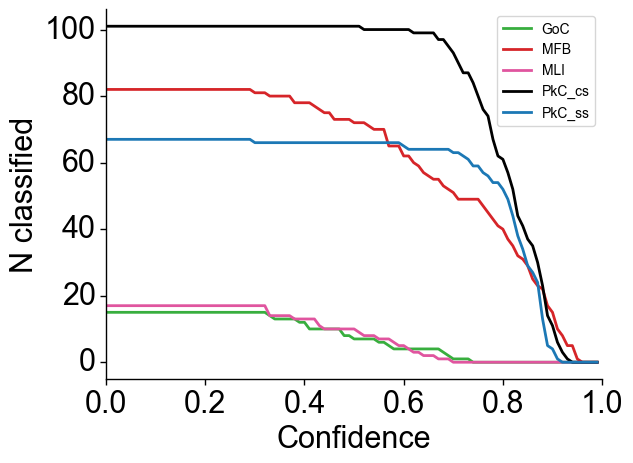

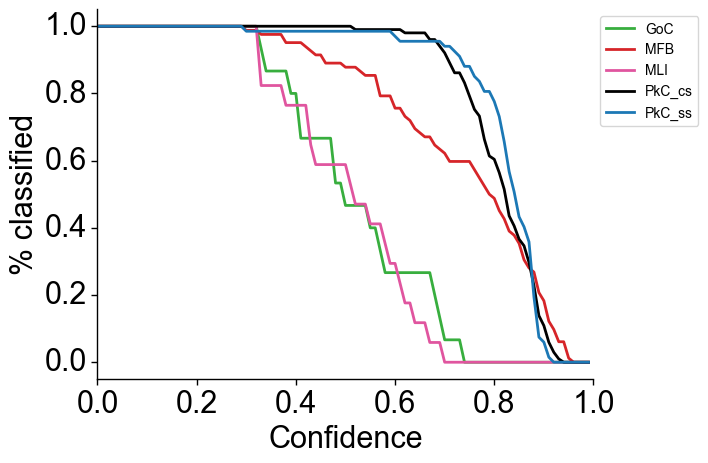

In [44]:
from npyx.c4.predict_cell_types import main as predict_cell_types

medina_dataset = os.path.join(WORKING_FOLDER, "C4_database_medina_unlabelled.h5")
predict_cell_types(data_path=medina_dataset, threshold=0)